# Chapter 6 - Unsupervised Machine Learning (Dimensionality Reduction)

### Import Libraries:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

## 1. Toxicity Dataset:

### Import Data:

In [2]:
df = pd.read_csv("../../datasets/dataset_toxicity_sd.csv")
print(df.shape)

(1460, 16)


In [3]:
df.columns

Index(['ID', 'smiles', 'toxic', 'FormalCharge', 'TPSA', 'MolWt', 'HeavyAtoms',
       'NHOH', 'HAcceptors', 'HDonors', 'Heteroatoms', 'AromaticRings',
       'SaturatedRings', 'AromaticOH', 'AromaticN', 'LogP'],
      dtype='object')

In [4]:
df.head()

,ID,smiles,toxic,FormalCharge,TPSA,MolWt,HeavyAtoms,NHOH,HAcceptors,HDonors,Heteroatoms,AromaticRings,SaturatedRings,AromaticOH,AromaticN,LogP
0,25239916,c1c2c(c(c(c1[131I])[O-])[131I])Oc3c(cc(c(c3[13...,0,-2,81.65,987.667498,33,0,5,0,13,3,0,0,0,7.4338
1,25239917,CCC[C@@H]1C[C@H]([NH+](C1)C)C(=O)N[C@@H]([C@@H...,0,1,123.69,407.553000,27,6,7,6,9,0,2,4,0,-2.2741
2,25239918,CNC(=O)c1cc(ccn1)Oc2ccc(cc2)NC(=O)Nc3ccc(c(c3)...,0,0,92.35,464.831000,32,3,4,3,11,3,0,0,1,5.5497
3,25239919,CN(C)c1cccc2c1ccc(c2)S(=O)(=O)[O-],0,-1,60.44,250.299000,17,0,4,0,5,2,0,0,0,1.8099
4,25239920,CC(C)c1ccc2c(c1)c(=O)c3cc(c(nc3o2)N)C(=O)[O-],0,-1,109.25,297.290000,22,2,6,1,6,3,0,0,1,1.4103


<AxesSubplot:>

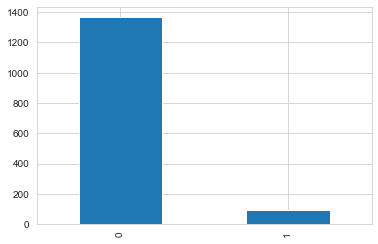

In [5]:
pd.value_counts(df["toxic"]).plot.bar()

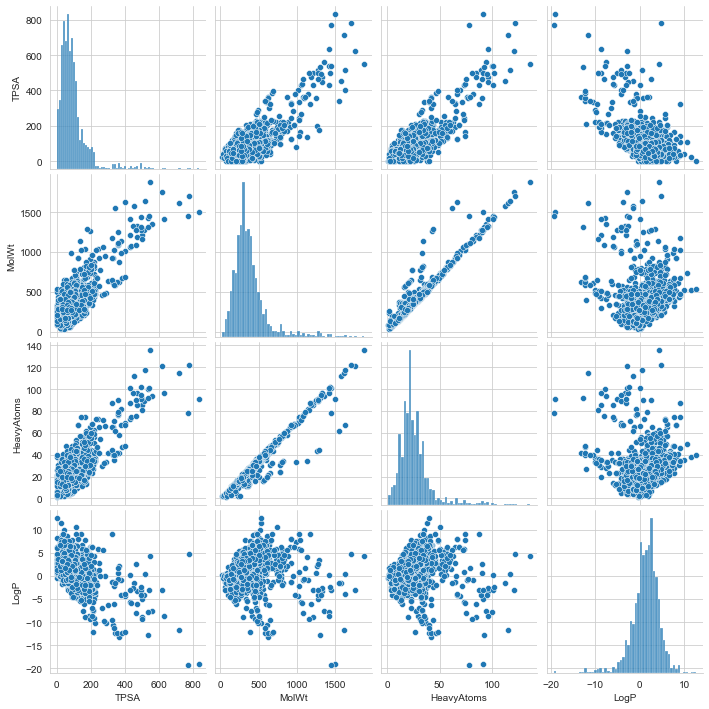

In [6]:
select_feats = ["TPSA", "MolWt", "HeavyAtoms", "LogP"]
sns_plot = sns.pairplot(df[select_feats], 
#                         hue="toxic", 
                        markers=["s", "o"])

<AxesSubplot:xlabel='TPSA', ylabel='LogP'>

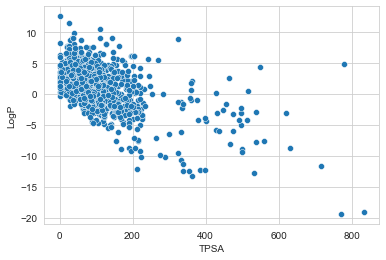

In [7]:
sns.scatterplot(x="TPSA", y="LogP", data=df)

<AxesSubplot:xlabel='MolWt', ylabel='SaturatedRings'>

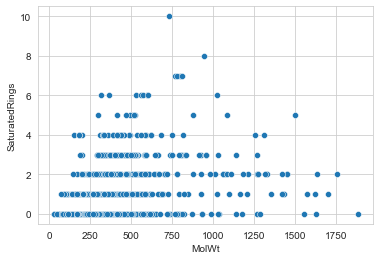

In [8]:
sns.scatterplot(x="MolWt", y="SaturatedRings", data=df)

<AxesSubplot:xlabel='TPSA', ylabel='HeavyAtoms'>

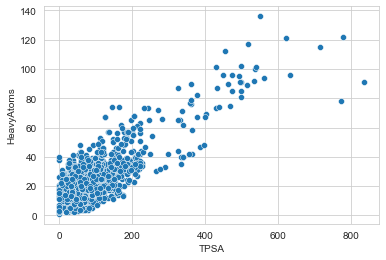

In [9]:
sns.scatterplot(x="TPSA", y="HeavyAtoms", data=df)

<AxesSubplot:xlabel='TPSA', ylabel='HeavyAtoms'>

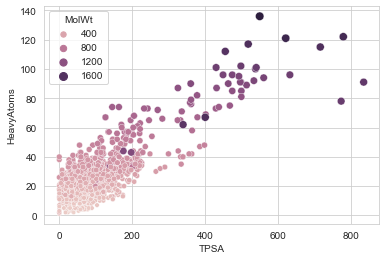

In [10]:
sns.scatterplot(x="TPSA", y="HeavyAtoms", hue="MolWt", size="MolWt", data=df)

<AxesSubplot:xlabel='TPSA', ylabel='LogP'>

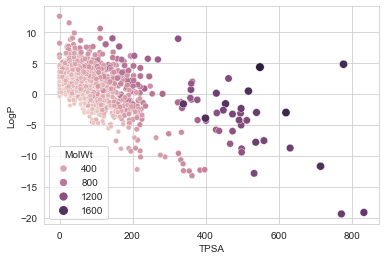

In [11]:
sns.scatterplot(x="TPSA", y="LogP", hue="MolWt", size="MolWt", data=df)

<AxesSubplot:xlabel='HeavyAtoms', ylabel='MolWt'>

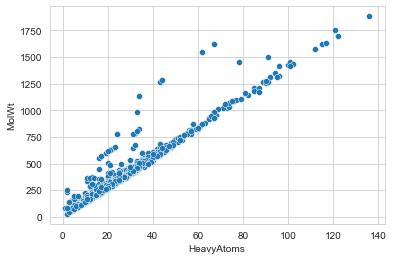

In [12]:
sns.scatterplot(x="HeavyAtoms", y="MolWt", data=df)

In [13]:
dfx = df.iloc[:, 3:]
y = df["toxic"].values
dfx.head()

,FormalCharge,TPSA,MolWt,HeavyAtoms,NHOH,HAcceptors,HDonors,Heteroatoms,AromaticRings,SaturatedRings,AromaticOH,AromaticN,LogP
0,-2,81.65,987.667498,33,0,5,0,13,3,0,0,0,7.4338
1,1,123.69,407.553000,27,6,7,6,9,0,2,4,0,-2.2741
2,0,92.35,464.831000,32,3,4,3,11,3,0,0,1,5.5497
3,-1,60.44,250.299000,17,0,4,0,5,2,0,0,0,1.8099
4,-1,109.25,297.290000,22,2,6,1,6,3,0,0,1,1.4103


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(dfx), columns = dfx.columns)
X_scaled.head(3)

,FormalCharge,TPSA,MolWt,HeavyAtoms,NHOH,HAcceptors,HDonors,Heteroatoms,AromaticRings,SaturatedRings,AromaticOH,AromaticN,LogP
0,-1.948928,-0.153365,2.644347,0.444576,-0.757191,-0.026147,-0.777019,0.970871,1.300975,-0.707688,-0.467342,-0.53589,1.942312
1,0.793219,0.316815,0.110073,0.058678,0.873739,0.433787,1.316702,0.287423,-1.180850,0.870959,2.439239,-0.53589,-1.127800
2,-0.120830,-0.033695,0.360296,0.380260,0.058274,-0.256114,0.269841,0.629147,1.300975,-0.707688,-0.467342,0.27657,1.346468


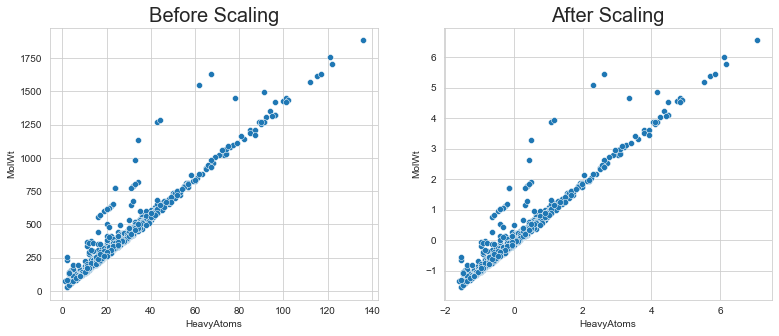

In [15]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.title("Before Scaling",fontsize=20)
ax = sns.scatterplot(x="HeavyAtoms", y="MolWt", data=df)

plt.subplot(132)
plt.title("After Scaling",fontsize=20)
ax = sns.scatterplot(x="HeavyAtoms", y="MolWt", data=X_scaled)


### Principal Component Analysis: (Linear)

In [16]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2, svd_solver='full')
pca_2d.fit(X_scaled)

data_pca_2d = pca_2d.fit_transform(X_scaled)

print(pca_2d.explained_variance_ratio_)

[0.48802155 0.14734046]


In [17]:
print(pca_2d.explained_variance_ratio_.sum())

0.6353620104892304


In [18]:
data_pca_2d[:,0]

array([ 0.42671994,  1.83663597,  0.26557162, ..., -1.32373957,
        1.62586322, -0.63800204])

<AxesSubplot:>

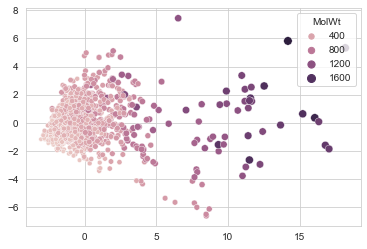

In [19]:
sns.scatterplot(x=data_pca_2d[:,0], y=data_pca_2d[:,1], hue=dfx.MolWt, size=dfx.MolWt)

<AxesSubplot:>

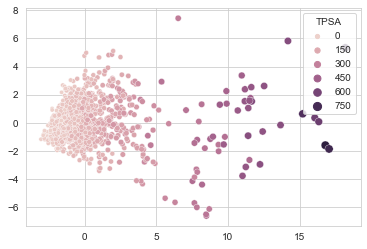

In [20]:
sns.scatterplot(x=data_pca_2d[:,0], y=data_pca_2d[:,1], hue=dfx.TPSA, size=dfx.TPSA)

In [21]:
from sklearn.decomposition import PCA

pca_3d = PCA(n_components=3, svd_solver='full')
pca_3d.fit(X_scaled)

data_pca_3d = pca_3d.fit_transform(X_scaled)

print(pca_3d.explained_variance_ratio_)
print(pca_3d.explained_variance_ratio_.sum())

[0.48802155 0.14734046 0.11048806]
0.745850071488356


### Single Value Decomposition:

In [22]:
from sklearn.decomposition import TruncatedSVD
svd_2d = TruncatedSVD(n_components=2, n_iter=7)
svd_2d.fit(X_scaled)

TruncatedSVD(n_iter=7)

In [23]:
data_svd_2d = svd_2d.fit_transform(X_scaled)

<AxesSubplot:>

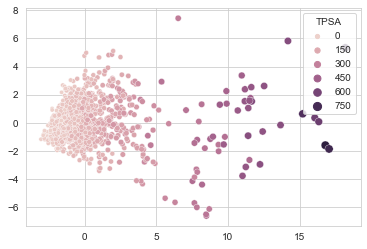

In [24]:
sns.scatterplot(x=data_svd_2d[:,0], y=data_svd_2d[:,1], hue=dfx.TPSA, size=dfx.TPSA)

### t-SNE (Non-Linear)

In [25]:
from sklearn.manifold import TSNE

data_tsne_2d = TSNE(n_components=2).fit_transform(X_scaled)

In [26]:
X_scaled.shape

(1460, 13)

In [27]:
data_tsne_2d.shape

(1460, 2)

<AxesSubplot:>

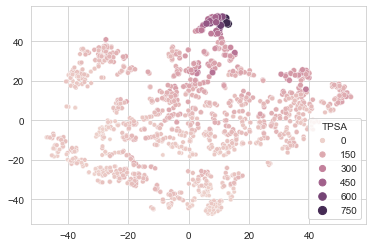

In [28]:
sns.scatterplot(x=data_tsne_2d[:,0], y=data_tsne_2d[:,1], hue=dfx.TPSA, size=dfx.TPSA)

### Multidimensional Scaling (MDS):

In [29]:
from sklearn.manifold import MDS
data_mds_2d = MDS(n_components=2, metric=True, random_state=2).fit_transform(X_scaled)

<AxesSubplot:>

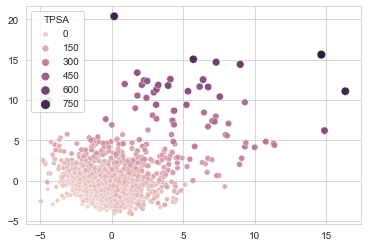

In [30]:
sns.scatterplot(x=data_mds_2d[:,0], y=data_mds_2d[:,1], hue=dfx.TPSA, size=dfx.TPSA)

## 2. Single Cell RNA Sequencing

In [36]:
dfx = pd.read_csv("../../datasets/single_cell_rna/nestorowa_corrected_log2_transformed_counts.txt", sep=' ',  )
dfx.head()

,1110032F04Rik,1110059E24Rik,1300017J02Rik,1600014C10Rik,1700017B05Rik,1700019G17Rik,1700024P16Rik,1700026L06Rik,1700029J07Rik,1700030K09Rik,...,Zscan22,Zscan29,Zswim3,Zswim4,Zswim6,Zufsp,Zxdb,Zxdc,Zyx,Zzz3
HSPC_001,0.0,0.000000,0.0,0.000000,1.225439,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.739099,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5.386021,10.541571
HSPC_002,0.0,0.000000,0.0,2.238601,2.238601,0.0,0.0,0.0,9.298240,0.0,...,0.000000,2.238601,0.000000,2.238601,0.0,2.238601,0.0,0.000000,9.164370,3.603855
HSPC_003,0.0,2.795189,0.0,0.000000,1.989360,0.0,0.0,0.0,0.000000,0.0,...,1.575509,4.234474,7.378198,0.000000,0.0,0.000000,0.0,0.000000,9.143168,2.310576
HSPC_004,0.0,1.326478,0.0,1.326478,2.005685,0.0,0.0,0.0,0.000000,0.0,...,0.000000,2.005685,1.326478,3.094148,0.0,5.788797,0.0,5.577271,4.136426,2.813850
HSPC_006,0.0,7.348663,0.0,4.946766,0.000000,0.0,0.0,0.0,1.941849,0.0,...,0.000000,8.441787,1.941849,3.926937,0.0,0.000000,0.0,0.000000,7.752007,8.871921


In [37]:
dfx.shape

(1645, 3991)

In [38]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1645 entries, HSPC_001 to Prog_852
Columns: 3991 entries, 1110032F04Rik to Zzz3
dtypes: float64(3991)
memory usage: 50.1+ MB


In [40]:
dfy = pd.DataFrame()
dfy['annotation'] = dfx.index.str[:4]
dfy['annotation'].value_counts()

Prog    791
HSPC    699
LT.H    155
Name: annotation, dtype: int64

### PCA:

In [42]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2, svd_solver='full')
pca_2d.fit(dfx)

data_pca_2d = pca_2d.fit_transform(dfx)

print(pca_2d.explained_variance_ratio_)

[0.1091818  0.03090783]


<AxesSubplot:>

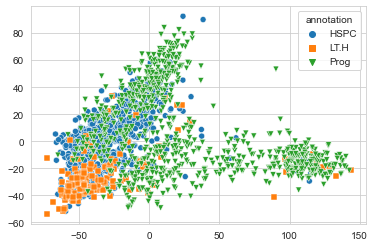

In [47]:
sns.scatterplot(x=data_pca_2d[:,0], y=data_pca_2d[:,1], hue=dfy.annotation, style=dfy.annotation, markers = ["o", "s", "v"])

### SVD:

In [103]:
from sklearn.decomposition import TruncatedSVD
svd_2d = TruncatedSVD(n_components=2, n_iter=7)

In [104]:
data_svd_2d = svd_2d.fit_transform(dfx)

<AxesSubplot:>

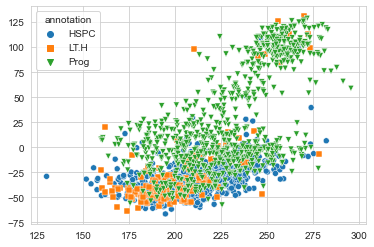

In [105]:
sns.scatterplot(x=data_svd_2d[:,0], y=data_svd_2d[:,1], hue=dfy.annotation, style=dfy.annotation, markers = ["o", "s", "v"])

In [106]:
%%timeit
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

gmm = GaussianMixture(n_components=2, covariance_type="full")
gmm_featAll_pred = 1-gmm.fit_predict(dfx)


12.4 s ± 158 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [107]:
%%timeit
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

gmm = GaussianMixture(n_components=2, covariance_type="full")
gmm_featAll_pred = 1-gmm.fit_predict(data_svd_2d)


4.06 ms ± 26.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### t-SNE:

<AxesSubplot:>

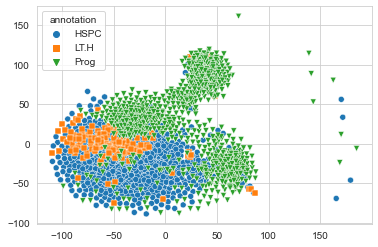

In [123]:
from sklearn.manifold import TSNE
data_tsne_2d_p10 = TSNE(n_components=2, perplexity=10.0).fit_transform(dfx)
sns.scatterplot(x=data_tsne_2d_p10[:,0], y=data_tsne_2d_p10[:,1], hue=dfy.annotation, style=dfy.annotation, markers = ["o", "s", "v"])

In [54]:
from sklearn.manifold import TSNE

In [70]:
data_tsne_2d_p1 = TSNE(n_components=2, perplexity=1.0).fit_transform(dfx)
data_tsne_2d_p10 = TSNE(n_components=2, perplexity=10.0).fit_transform(dfx)
data_tsne_2d_p30 = TSNE(n_components=2, perplexity=30.0).fit_transform(dfx)

<AxesSubplot:title={'center':'t-SNE: Perplexity = 30'}>

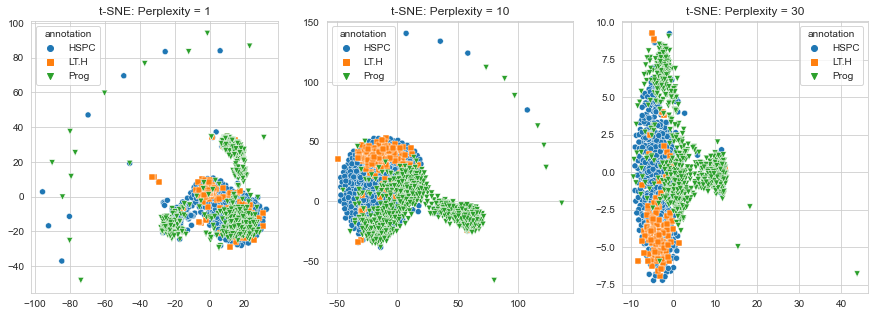

In [71]:
fig = plt.figure(figsize=(15, 5))

fig.add_subplot(131)
plt.title("t-SNE: Perplexity = 1")
sns.scatterplot(x=data_tsne_2d_p1[:,0], y=data_tsne_2d_p1[:,1], hue=dfy.annotation, style=dfy.annotation, markers = ["o", "s", "v"])
fig.add_subplot(132) 
plt.title("t-SNE: Perplexity = 10")
sns.scatterplot(x=data_tsne_2d_p10[:,0], y=data_tsne_2d_p10[:,1], hue=dfy.annotation, style=dfy.annotation, markers = ["o", "s", "v"])
fig.add_subplot(133) 
plt.title("t-SNE: Perplexity = 30")
sns.scatterplot(x=data_tsne_2d_p30[:,0], y=data_tsne_2d_p30[:,1], hue=dfy.annotation, style=dfy.annotation, markers = ["o", "s", "v"])

### UMap:

In [72]:
import umap

<AxesSubplot:>

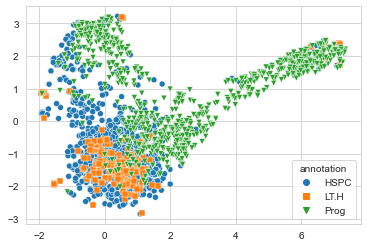

In [125]:
import umap
data_umap_2d_n5 = umap.UMAP(n_components=2, n_neighbors=5).fit_transform(dfx)
sns.scatterplot(x=data_umap_2d_n5[:,0], y=data_umap_2d_n5[:,1], hue=dfy.annotation, style=dfy.annotation, markers = ["o", "s", "v"])


In [130]:
data_umap_2d_n5 = umap.UMAP(n_components=2, n_neighbors=5).fit_transform(dfx)
data_umap_2d_n50 = umap.UMAP(n_components=2, n_neighbors=10).fit_transform(dfx)
data_umap_2d_n100 = umap.UMAP(n_components=2, n_neighbors=15).fit_transform(dfx)

<AxesSubplot:title={'center':'UMAP: n_neighbors = 100'}>

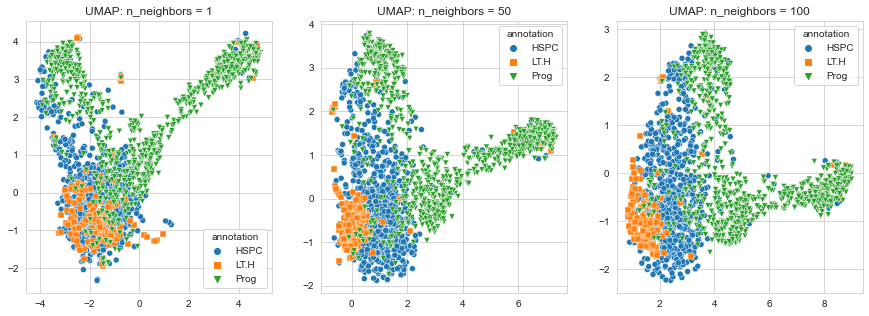

In [131]:
fig = plt.figure(figsize=(15, 5))

fig.add_subplot(131)
plt.title("UMAP: n_neighbors = 1")
sns.scatterplot(x=data_umap_2d_n5[:,0], y=data_umap_2d_n5[:,1], hue=dfy.annotation, style=dfy.annotation, markers = ["o", "s", "v"])
fig.add_subplot(132) 
plt.title("UMAP: n_neighbors = 50")
sns.scatterplot(x=data_umap_2d_n50[:,0], y=data_umap_2d_n50[:,1], hue=dfy.annotation, style=dfy.annotation, markers = ["o", "s", "v"])
fig.add_subplot(133) 
plt.title("UMAP: n_neighbors = 100")
sns.scatterplot(x=data_umap_2d_n100[:,0], y=data_umap_2d_n100[:,1], hue=dfy.annotation, style=dfy.annotation, markers = ["o", "s", "v"])